# [모델 성능 평가지표(Metric)](https://scikit-learn.org/stable/modules/model_evaluation.html#)
> 실제값과 모델에 의해 예측된 값을 비교하여 모델의 성능을 측정하는 방법


# 회귀 모형 성능 측정

## 회기모델(Linear Regression) 학습 및 예측

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

data = diabetes.data
target = diabetes.target
data.shape , target.shape

((442, 10), (442,))

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42
x_train, x_valid , y_train, y_valid = train_test_split(data, target, random_state=SEED)
x_train.shape, x_valid.shape , y_train.shape, y_valid.shape

((331, 10), (111, 10), (331,), (111,))

In [ ]:
from sklearn.linear_model import LinearRegression
# 모델 생성
model = LinearRegression()
# 모델 학습
model.fit(x_train,y_train)
# 모델 예측
pred = model.predict(x_valid)

In [ ]:
pred.shape, y_valid.shape

((111,), (111,))

In [ ]:
pred[:5]

array([137.94908878, 182.533354  , 129.85295373, 292.5630923 ,
       124.86788221])

In [ ]:
y_valid[:5]

array([219.,  70., 202., 230., 111.])

In [ ]:
y_valid.mean()

145.54054054054055

## 회귀 평가 지표

### R2(결정계수; Coefficient of Determination)
- 회귀식이 얼마나 정확한지를 나타내는 숫자
- $ 0 <= R^2 <= 1$  

$$
R^2 = { SSR \over SST } = { \sum{(\hat{y}_i - \bar{y} )^2 } \over \sum{(y_i - \bar{y})^2 } } = { 회귀선에 의해 설명되는 변동 \over 전체변동 }
$$

- 기호 설명
  - $ \bar{y} = y 평균값 $
  - $ \hat{y} = y 예측값 $
  - $ y = y 실제값 $

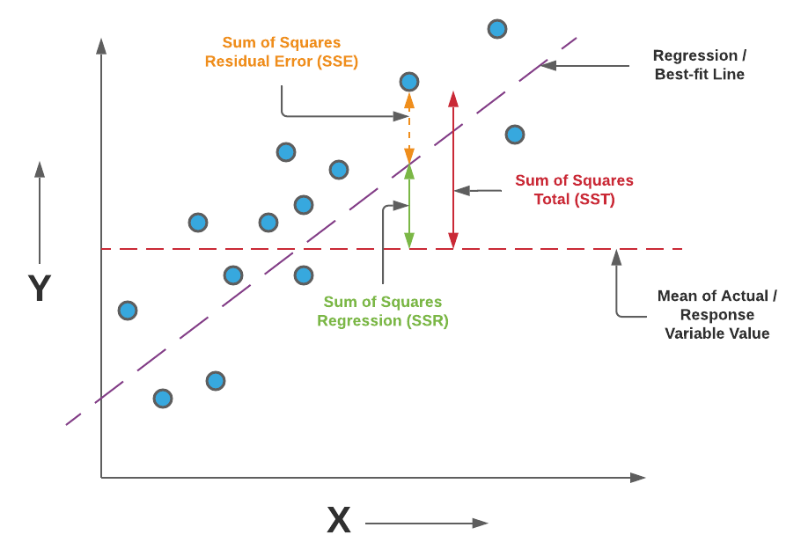

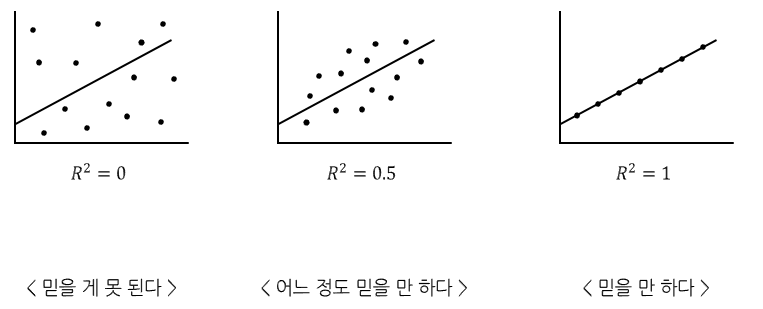

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_valid, pred)
r2

0.4849058889476756

### [MSE(Mean Squared Error)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)
- 실제값과 예측값의 차이를 제곱한뒤 평균화
- 이상치 민감
- 직관적이지 못하다.
- 손실함수로 주로 사용한다.
$$
MSE = \frac{1}{n}{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}
$$

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_valid, pred)
mse

2848.3106508475053

### RMSE(Root Mean Squared Error)
- MSE에 루트
- 이상치 민감
$$
RMSE = \sqrt{\frac{1}{n}{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}}
$$

In [ ]:
import numpy as np

np.sqrt(mse)

53.369566710321955

### RMSLE(Root Mean Squared Logarithmic Error)
- 잔차(residual)에 대한 평균에 로그를 씌운 값
- 과대평가 된 항목보다 과소 평가 된 항목에 패널티를 주기위해
- 정답에 대한 오류를 숫자로 나타낸 값이 클 수록 오차가 크다는 의미이다.
  - 즉, 값이 작을 수록 오류가 적다는 의미를 나타낸다.

$$ RMSLE= \sqrt{\frac{1}{n}\sum_{i=1}^{n}(log(y_{i}+1)-log(y\hat{}_{i}+1))^2}$$

In [ ]:
def rmsle(y, pred, convertExp=False):
    if convertExp:
        y = np.exp(y)
        pred = np.exp(pred)

    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in pred]))
    calc = (log1 - log2)**2

    return np.sqrt(np.mean(calc))

In [ ]:
rmsle_score = rmsle(y_valid, pred)
rmsle_score

0.41800989606003214

### MAE(Mean Absolute Error)
- 실제값과 예측값의 차이를 절대값으로 변환해서 평균화
$$
MAE = \frac{1}{n}{\sum_{i=1}^{n}|y_i-\hat{y}_i|}
$$

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_valid, pred)
mae

41.54850685988061

### [MAPE(Mean Absolute Percentage Error)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html)
- 실제값에 대한 절대오차 비율의 평균을 퍼센트로 표현
- MSE, RMSE의 단점을 보완

$$
MAPE = \frac{100}{n}{\sum_{i=1}^{n}\frac{|y_i-\hat{y}_i|}{y_i}}
$$

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_valid, pred)

0.37310970433744683

### SMAPE(Symmetric Mean Absolute Percentage Error)
- 기존 MAPE의 단점 보완
- MAPE와 다른점은 각 실제값과 예측값을 절대값으로 변경후 합으로 나눈다.
- MAPE와 다르게 실제값에 0이 존재해도 계산이 가능하다.
- 과소추정에 대한 패널티를 줄수가 있다.
$$
SMAPE = \frac{100}{n}{\sum_{i=1}^{n}\frac{|y_i-\hat{y}_i|}{{|y_i|}+|\hat{y_i}|}}
$$

In [ ]:
def smape(true,pred):
    error = np.abs(true-pred) / (np.abs(true) + np.abs(pred))
    return np.mean(error)

smape(y_valid,pred)

0.1527140597913506